In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from fastai.vision.all import *

In [26]:
train_df=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/Train (6).csv")
test_df=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/Test (8).csv")
sub=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/SampleSubmission (4).csv")

In [27]:
test_df

,Image_id
0,id_00vl5wvxq3.jpg
1,id_00vl5wvxq3_rgn.jpg
2,id_01hu05mtch.jpg
3,id_01hu05mtch_rgn.jpg
4,id_030ln10ewn.jpg
...,...
2285,id_ztvp2l9k3h_rgn.jpg
2286,id_zwwcma7hlt.jpg
2287,id_zwwcma7hlt_rgn.jpg
2288,id_zyo7m4fj8h.jpg


In [28]:
train_df

,Image_id,Label
0,id_004wknd7qd.jpg,blast
1,id_004wknd7qd_rgn.jpg,blast
2,id_005sitfgr2.jpg,brown
3,id_005sitfgr2_rgn.jpg,brown
4,id_00stp9t6m6.jpg,blast
...,...,...
5335,id_zz6gzk7p97_rgn.jpg,brown
5336,id_zz8ca2p67e.jpg,blast
5337,id_zz8ca2p67e_rgn.jpg,blast
5338,id_zzt8y9q0x0.jpg,brown


In [29]:
Id=test_df["Image_id"]

In [30]:
train_df.Label.unique()

array(['blast', 'brown', 'healthy'], dtype=object)

In [31]:
train_df.Label.value_counts()

blast      2988
brown      1532
healthy     820
Name: Label, dtype: int64

In [32]:
# dls = ImageDataLoaders.from_df(train_df,bs=32, path='../input/microsoft-rice-disease-classification-challenge/Images (1)/', num_workers=-1) # See the docs for adding augmentations etc
# dls.show_batch() 


In [33]:
path='../input/microsoft-rice-disease-classification-challenge/Images (1)/'
img_paths = []
for i in train_df.Image_id:
    img_paths.append(path + i)
train_df['path'] = img_paths

In [34]:
train_df

,Image_id,Label,path
0,id_004wknd7qd.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd.jpg
1,id_004wknd7qd_rgn.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd_rgn.jpg
2,id_005sitfgr2.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2.jpg
3,id_005sitfgr2_rgn.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2_rgn.jpg
4,id_00stp9t6m6.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_00stp9t6m6.jpg
...,...,...,...
5335,id_zz6gzk7p97_rgn.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz6gzk7p97_rgn.jpg
5336,id_zz8ca2p67e.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e.jpg
5337,id_zz8ca2p67e_rgn.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e_rgn.jpg
5338,id_zzt8y9q0x0.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zzt8y9q0x0.jpg


In [35]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

train_df= pd.get_dummies(train_df, columns = ["Label"])

In [38]:
train_df

,Image_id,path,Label_blast,Label_brown,Label_healthy
0,id_004wknd7qd.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd.jpg,1,0,0
1,id_004wknd7qd_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd_rgn.jpg,1,0,0
2,id_005sitfgr2.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2.jpg,0,1,0
3,id_005sitfgr2_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2_rgn.jpg,0,1,0
4,id_00stp9t6m6.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_00stp9t6m6.jpg,1,0,0
...,...,...,...,...,...
5335,id_zz6gzk7p97_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz6gzk7p97_rgn.jpg,0,1,0
5336,id_zz8ca2p67e.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e.jpg,1,0,0
5337,id_zz8ca2p67e_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e_rgn.jpg,1,0,0
5338,id_zzt8y9q0x0.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zzt8y9q0x0.jpg,0,1,0


In [36]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

In [41]:
train_generator = train_datagenerator.flow_from_dataframe(
    train_df, 
    x_col='path', 
    y_col=['Label_blast',"Label_brown","Label_healthy"],
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='raw', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    train_df , 
    x_col='path',
    y_col=['Label_blast',"Label_brown","Label_healthy"],
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='raw', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 4806 validated image filenames.
Found 534 validated image filenames.


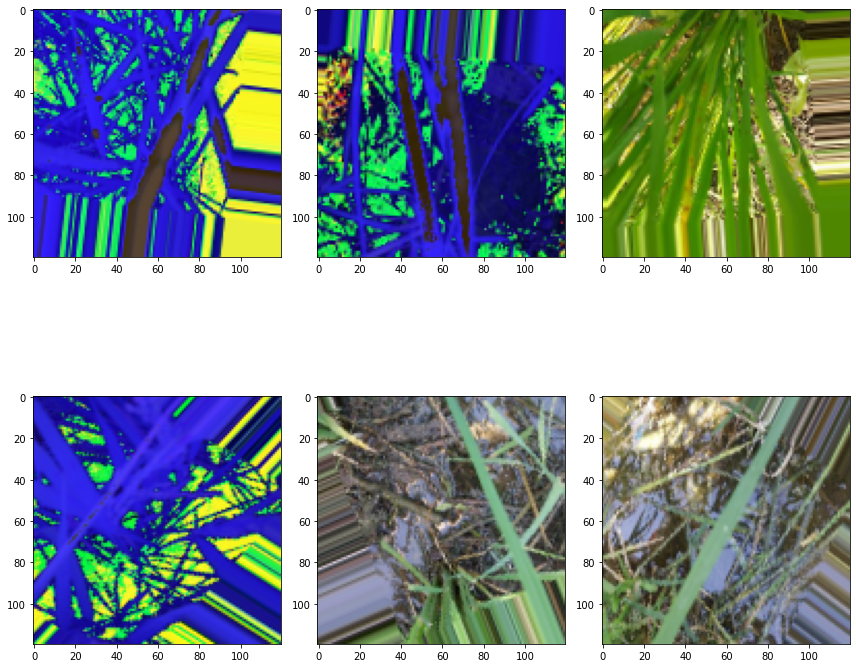

In [42]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [44]:
train_df=train_df.drop("Image_id", axis=1, inplace=True)

In [45]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))


model.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

        
model.add(ks.layers.Flatten())
        
model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [46]:
batch_size=15
FAST_RUN = False
epochs=5 if FAST_RUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/100


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,3] and labels shape [96]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at tmp/ipykernel_17/3756038183.py:7) ]] [Op:__inference_train_function_3150]

Function call stack:
train_function
